In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import scipy.stats
import seaborn as sns


# Analyse des consommations d'énergie dans les logements en Ile de France

## Lecture des données

In [ ]:
folder_path = "" # chemin vers le dossier où est écrit le fichier conso_residentiel_2018_cc_commune_type_usage_energie.csv 
df = pd.read_csv(os.path.join(folder_path, "conso_residentiel_2018_cc_commune_type_usage_energie.csv"),
                             sep = ';', decimal = '.', encoding = 'latin1')

In [82]:
df.columns

Index(['categorie', 'commune', 'nom commune', 'conso', 'type_batiment',
       'usage', 'energie'],
      dtype='object')

Les différentes colonnes de ce dataframe:
- **categorie**: logement principal ou secondaire
- **commune**: code postal de la commune des logements concernés
- **nom commune**
- **conso**: consommation totale annuelle d'énergie en 2018 (en MWh) pour les logements concernés **et pour l'usage énergétique concerné**. Cette consommation est **corrigée du climat**, ce qui signifie qu'elle a été normalisée par un **indice de rigueur** qui sans rentrer dans les détails représente à quel point l'année 2018 a été froide par rapport à une année climatique moyenne.
- **type_batiment**: logement dans une maison ou un immeuble
- **usage**: usage énergétique du logement (chauffage, eau chaude sanitaire, autres (cuisson, éclairage, climatisation, ....))
- **énergie**: vecteur énergétique utilisé pour cet usage énergétique (électricité, gaz naturel, chauffage urbain, produits pétroliers/charbon (fioul domestique, GPL, etc...), bois)

## Analyse
A vous de jouer !

> ## **Traitement des données**

In [83]:
df.head() # appercu de la base

,categorie,commune,nom commune,conso,type_batiment,usage,energie
0,Principal,75101,Paris 1er Arrondissement,80.0,Maison,Chauffage,Bois
1,Principal,75102,Paris 2e Arrondissement,NaN,Maison,Chauffage,Bois
2,Principal,75103,Paris 3e Arrondissement,120.0,Maison,Chauffage,Bois
3,Principal,75104,Paris 4e Arrondissement,100.0,Maison,Chauffage,Bois
4,Principal,75105,Paris 5e Arrondissement,300.0,Maison,Chauffage,Bois


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22477 entries, 0 to 22476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   categorie      22477 non-null  object 
 1   commune        22477 non-null  int64  
 2   nom commune    22477 non-null  object 
 3   conso          22469 non-null  float64
 4   type_batiment  22477 non-null  object 
 5   usage          22477 non-null  object 
 6   energie        22477 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


> **La base de données comporte 22477 lignes et 7 colonnes**

> **On vérifie la présence de doublons**

In [85]:
df.duplicated().value_counts()

False    22477
dtype: int64

> **Il n'y a pas de doublons dans la base**

> **On vérifie la présence de données manquantes**

In [86]:
df.isnull().sum()

categorie        0
commune          0
nom commune      0
conso            8
type_batiment    0
usage            0
energie          0
dtype: int64

> **Seule la colonne conso présente des données manquantes(8)**

> **On regarde à quoi correspond ces données**

In [87]:
df_null=df[df['conso'].isnull()]
df_null

,categorie,commune,nom commune,conso,type_batiment,usage,energie
1,Principal,75102,Paris 2e Arrondissement,NaN,Maison,Chauffage,Bois
22261,Principal,92012,Boulogne-Billancourt,NaN,Immeuble,Chauffage,Chauffage Urbain
22262,Principal,92022,Chaville,NaN,Immeuble,Chauffage,Chauffage Urbain
22263,Principal,92023,Clamart,NaN,Immeuble,Chauffage,Chauffage Urbain
22264,Principal,92024,Clichy,NaN,Immeuble,Chauffage,Chauffage Urbain
22420,Principal,93008,Bobigny,NaN,Immeuble,ECS,Chauffage Urbain
22421,Principal,93010,Bondy,NaN,Immeuble,ECS,Chauffage Urbain
22422,Principal,93014,Clichy-sous-Bois,NaN,Immeuble,ECS,Chauffage Urbain


> **Ce sont en majorité des données sur des immeubles**

> **Etant donné leur faible nombre, on va les remplacer par la moyennes**

In [88]:
mean=df["conso"].mean()  
df["conso"].replace(np.nan,mean, inplace=True)  
df.isnull().sum()

categorie        0
commune          0
nom commune      0
conso            0
type_batiment    0
usage            0
energie          0
dtype: int64

> **Il n'y a plus de données manquantes**

> **On importe à présent la base de données des contours communaux en Ile de France**

In [89]:
import geopandas as gpd

In [90]:
communes = gpd.read_file("Communes_IDF/communes_IDF.shp")
communes.head()

,insee,nom,wikipedia,surf_ha,geometry
0,78020,Arnouville-lès-Mantes,fr:Arnouville-lès-Mantes,989.0,"POLYGON ((1.69562 48.90558, 1.69705 48.90696, ..."
1,77225,La Haute-Maison,fr:La Haute-Maison,1295.0,"POLYGON ((2.97134 48.90059, 2.97227 48.90160, ..."
2,77464,Thorigny-sur-Marne,fr:Thorigny-sur-Marne,513.0,"POLYGON ((2.69311 48.89990, 2.69451 48.89980, ..."
3,93053,Noisy-le-Sec,fr:Noisy-le-Sec,504.0,"POLYGON ((2.43902 48.89320, 2.43959 48.89455, ..."
4,78416,Montalet-le-Bois,fr:Montalet-le-Bois,302.0,"POLYGON ((1.81515 49.05548, 1.82068 49.05614, ..."


In [91]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   insee      1268 non-null   object  
 1   nom        1268 non-null   object  
 2   wikipedia  1268 non-null   object  
 3   surf_ha    1268 non-null   float64 
 4   geometry   1268 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 49.7+ KB


> **Il n'y a aucune données manquantes**

In [92]:
communes.insee.value_counts()

78020    1
94074    1
77365    1
77322    1
77148    1
        ..
77400    1
91100    1
78013    1
77125    1
77304    1
Name: insee, Length: 1268, dtype: int64

In [93]:
df.commune.value_counts()

75101    22
94037    22
94071    22
94065    22
94059    22
         ..
77267     7
91526     7
78385     7
91137     7
78163     7
Name: commune, Length: 1287, dtype: int64

> **La colonne 'insee' n'est au bon format. On la converti en entier**

In [94]:
communes.insee=communes.insee.astype('int')

In [95]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   insee      1268 non-null   int32   
 1   nom        1268 non-null   object  
 2   wikipedia  1268 non-null   object  
 3   surf_ha    1268 non-null   float64 
 4   geometry   1268 non-null   geometry
dtypes: float64(1), geometry(1), int32(1), object(2)
memory usage: 44.7+ KB


> **Concaténation des deux bases**

In [96]:
df_final=pd.merge(df, communes, how='left',validate='m:1',
              left_on='commune',right_on='insee', indicator='merge_type')
df_final.head()

,categorie,commune,nom commune,conso,type_batiment,usage,energie,insee,nom,wikipedia,surf_ha,geometry,merge_type
0,Principal,75101,Paris 1er Arrondissement,80.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
1,Principal,75102,Paris 2e Arrondissement,3645.267702,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
2,Principal,75103,Paris 3e Arrondissement,120.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
3,Principal,75104,Paris 4e Arrondissement,100.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
4,Principal,75105,Paris 5e Arrondissement,300.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only


In [97]:
df_final['geometry'].isnull().sum()

440

In [98]:
df_final['merge_type'].value_counts()

both          22037
left_only       440
right_only        0
Name: merge_type, dtype: int64

> **440 enrégistrements de la base des consommations ne figurent pas dans la base des communes**

> ## **Analyse Exploratoire**

In [110]:
df_final.loc[:,['conso']].describe()

,conso
count,22477.000000
mean,3645.267702
std,14585.986043
min,0.000000
25%,60.000000
50%,440.000000
75%,2070.000000
max,676920.000000


> **La consommation moyenne en énergie en île de France était de 3645.267702 MWH en 2018**

In [108]:
df_final['categorie'].value_counts()

Principal    22477
Name: categorie, dtype: int64

In [111]:
df_final.describe(include='object')

,categorie,nom commune,type_batiment,usage,energie,nom,wikipedia
count,22477,22477,22477,22477,22477,22037,22037
unique,1,1283,2,3,5,1263,1267
top,Principal,Marolles-en-Brie,Maison,Chauffage,Electricite,Saint-Martin-des-Champs,fr:Ozoir-la-Ferrière
freq,22477,32,11756,9091,7461,32,22


> Les logements en île de France sont majoritairement en usage principal.\
> Les maisons sont le plus souvent le type de logement rencontré en île de france.\
> L'énergie est principalement utilisée pour le chauffage.\
> L'électricité est l'énergie le plus couramment utilisée en île de france.

In [113]:
df_final.columns

Index(['categorie', 'commune', 'nom commune', 'conso', 'type_batiment',
       'usage', 'energie', 'insee', 'nom', 'wikipedia', 'surf_ha', 'geometry',
       'merge_type'],
      dtype='object')

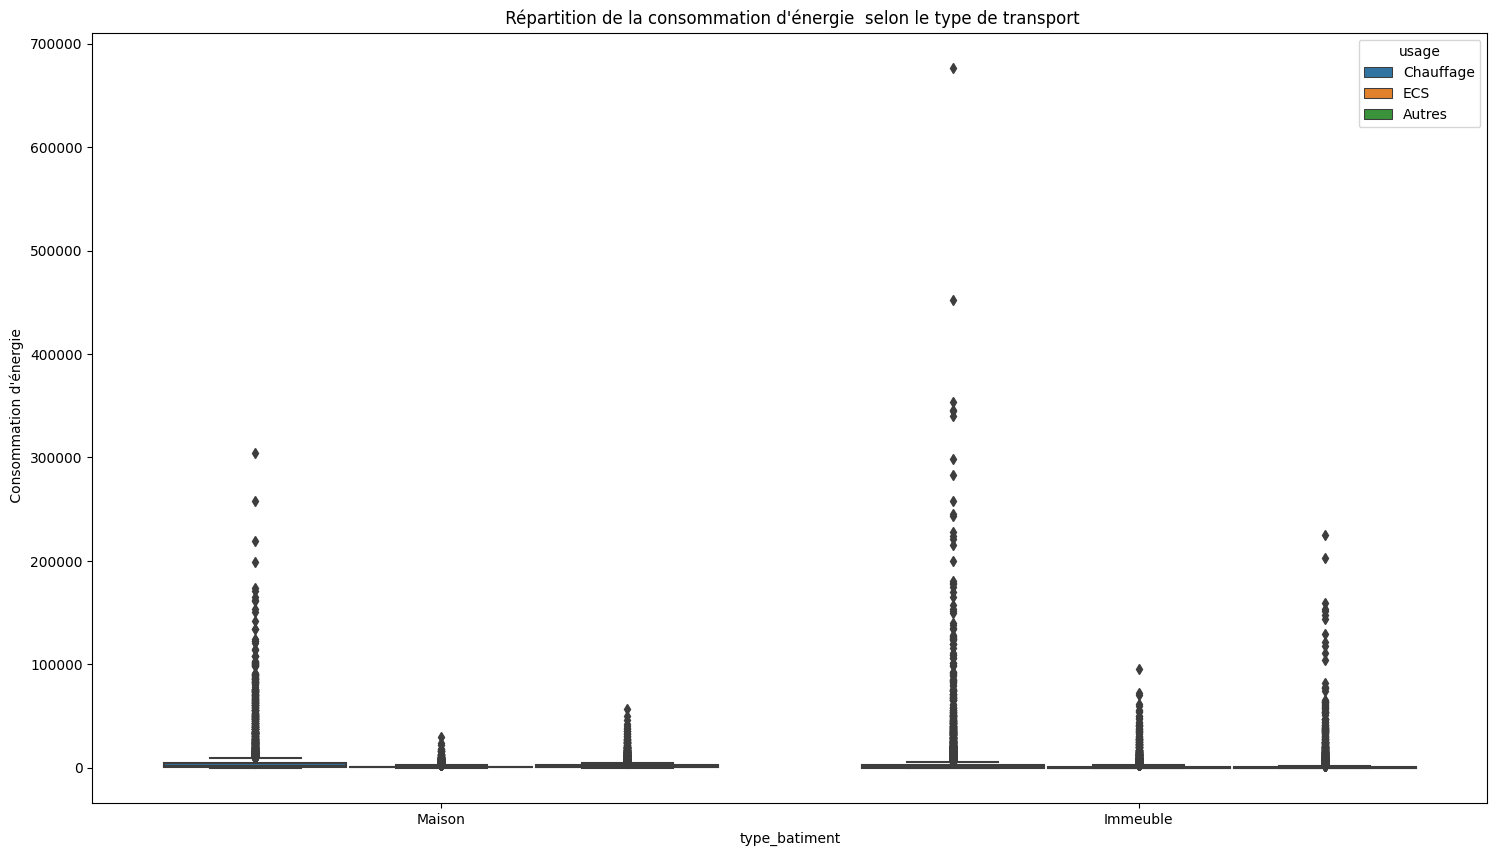

In [116]:
plt.figure(figsize=(18,10))
sns.boxplot(x='type_batiment',y='conso',hue='usage', data=df_final).set_title(' Répartition de la consommation d\'énergie  selon le type de batiment')
plt.ylabel(' Consommation d\'énergie')
plt.show()

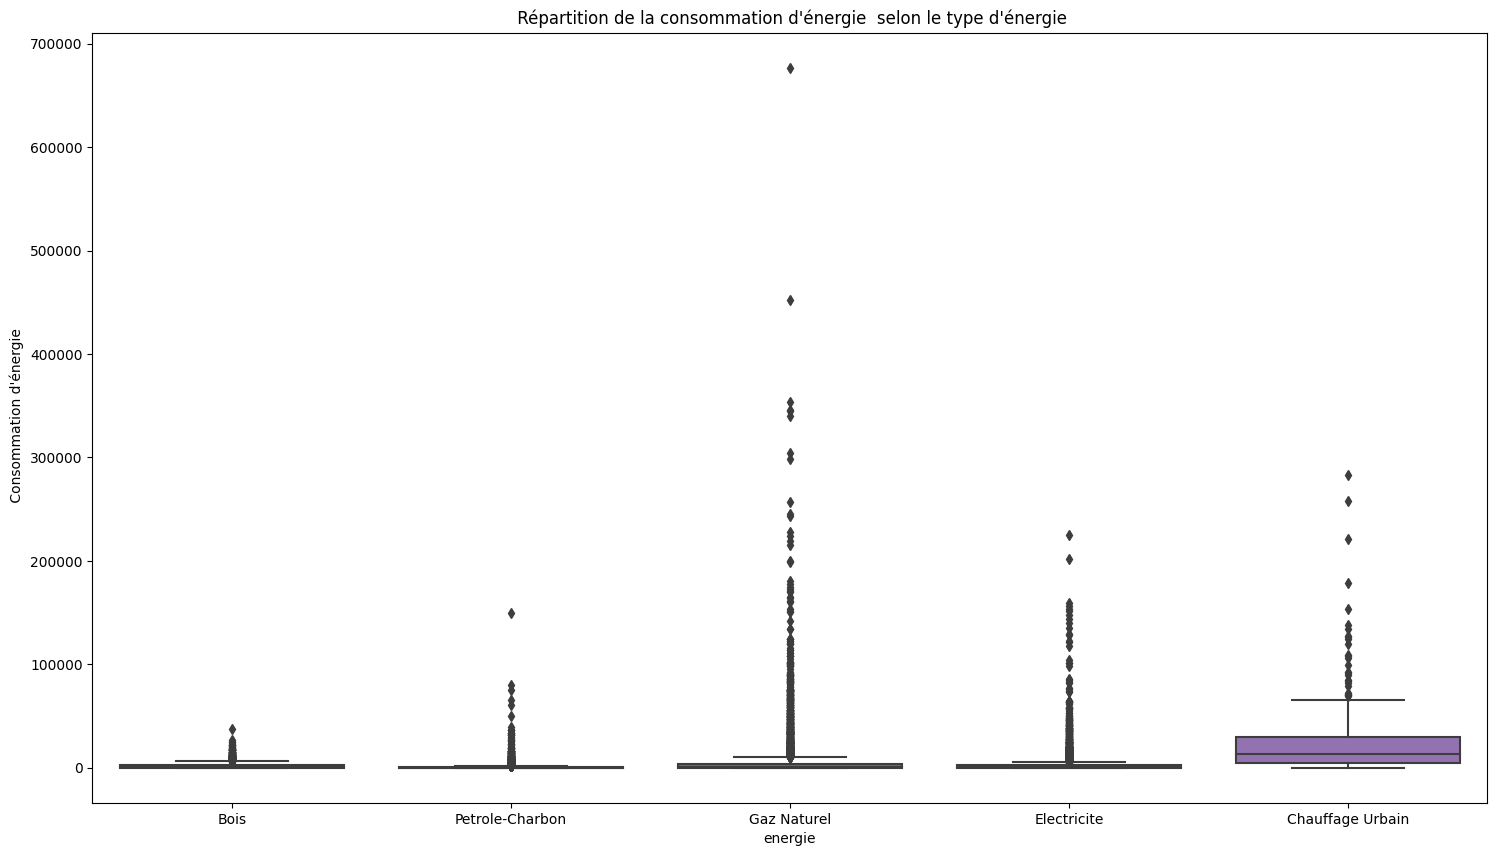

In [126]:
plt.figure(figsize=(18,10))
sns.boxplot(x='energie',y='conso', data=df_final).set_title(' Répartition de la consommation d\'énergie  selon le type d\'énergie')
plt.ylabel(' Consommation d\'énergie')
plt.show()

In [120]:
df_final.columns

Index(['categorie', 'commune', 'nom commune', 'conso', 'type_batiment',
       'usage', 'energie', 'insee', 'nom', 'wikipedia', 'surf_ha', 'geometry',
       'merge_type'],
      dtype='object')

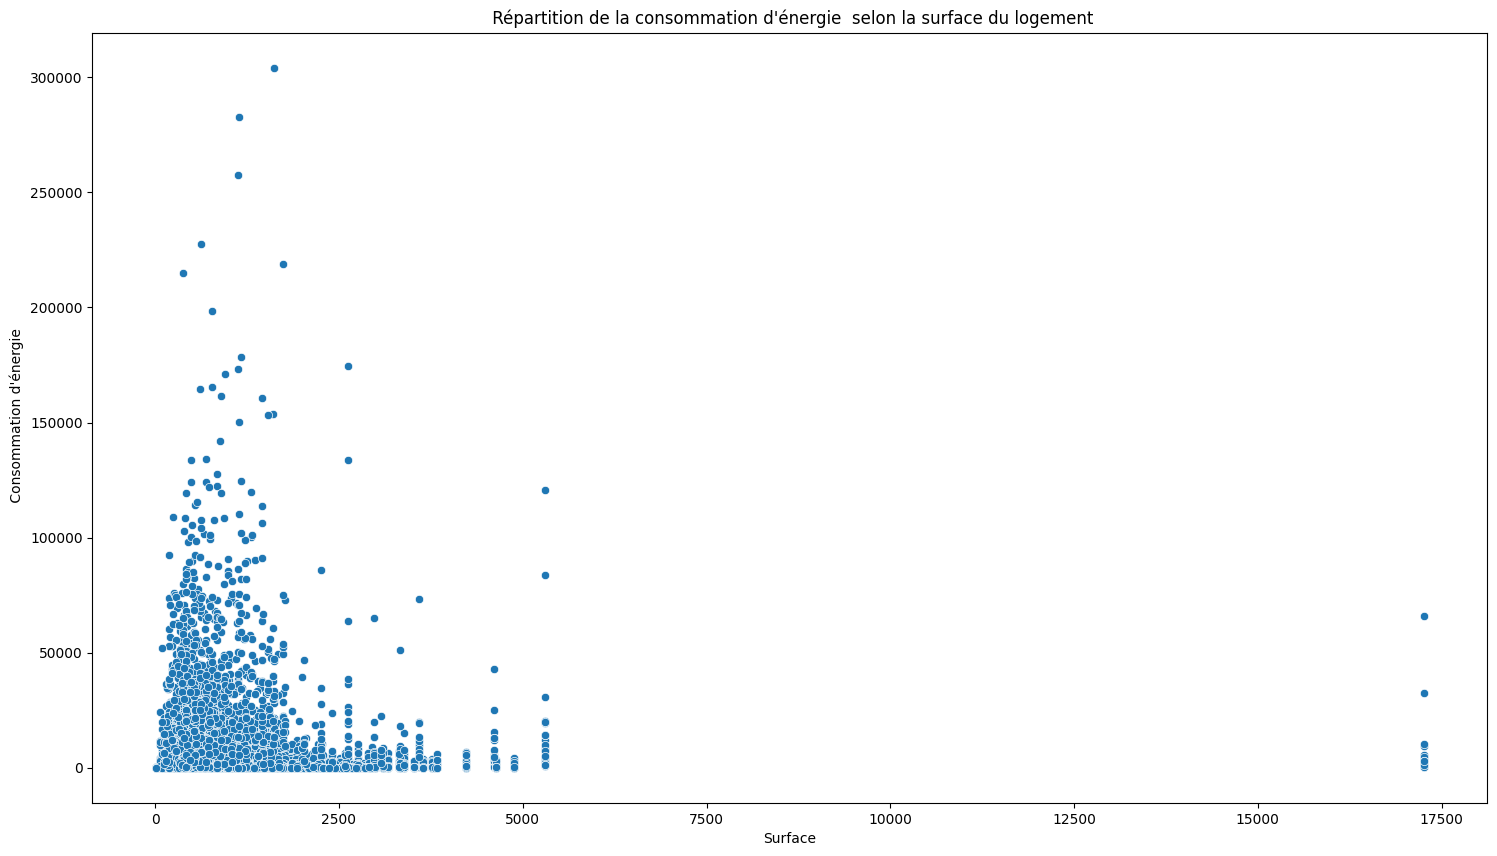

In [122]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='surf_ha',y='conso',data=df_final).set_title(' Répartition de la consommation d\'énergie  selon la surface du logement')
plt.xlabel('Surface')
plt.ylabel(' Consommation d\'énergie')
plt.show()

>**Il ne semble pas avoir de lien entre la consommation d'énergie et la surface du logement**

>**Consommation moyenne selon la commune**

In [154]:
df_final.filter(items=['nom commune','conso','energie','usage'
                       ]).drop_duplicates().groupby(by=['nom commune']).agg({'conso': ['mean']})

,conso
,mean
nom commune,
Abbéville-la-Rivière,384.285714
Ableiges,468.333333
Ablis,1196.000000
Ablon-sur-Seine,2091.500000
Achères,6886.363636
...,...
Étréchy,2914.500000
Étrépilly,341.500000


>**Consommation moyenne selon la commune et le type d'énergie**

In [152]:
df_final.filter(items=['nom commune','conso','energie','usage',
                       ]).drop_duplicates().groupby(by=['nom commune', 'energie']).agg({'conso': ['mean']})

conso
                                             mean
nom commune          energie                     
Abbéville-la-Rivière Bois              670.000000
                     Electricite       383.333333
                     Petrole-Charbon   290.000000
Ableiges             Bois              470.000000
                     Electricite       596.666667
...                                           ...
Évry-Grégy-sur-Yerre Petrole-Charbon   520.000000
Ézanville            Bois             1595.000000
                     Electricite      3180.000000
                     Gaz Naturel      7830.000000
                     Petrole-Charbon   855.000000

[4907 rows x 1 columns]

>**Consommation moyenne selon la commune et le type d'usage**

In [153]:
df_final.filter(items=['nom commune','conso','energie','usage',
                       ]).drop_duplicates().groupby(by=['nom commune', 'usage']).agg({'conso': ['mean']})

conso
                                       mean
nom commune          usage                 
Abbéville-la-Rivière Autres      335.000000
                     Chauffage   586.666667
                     ECS         130.000000
Ableiges             Autres      345.000000
                     Chauffage   780.000000
...                                     ...
Évry-Grégy-sur-Yerre Chauffage  2240.000000
                     ECS         482.000000
Ézanville            Autres     2341.666667
                     Chauffage  6611.250000
                     ECS        1240.000000

[3849 rows x 1 columns]

In [129]:
import geopandas as gpd

In [146]:
gdf = gpd.GeoDataFrame(
    df_final, geometry='geometry', crs="EPSG:4326"
)

In [138]:
#gdf=gdf.drop(columns=['insee','nom','wikipedia','wikipedia','merge_type'], inplace=True)

In [141]:
gdf.head()

,categorie,commune,nom commune,conso,type_batiment,usage,energie,insee,nom,wikipedia,surf_ha,geometry,merge_type
0,Principal,75101,Paris 1er Arrondissement,80.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
1,Principal,75102,Paris 2e Arrondissement,3645.267702,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
2,Principal,75103,Paris 3e Arrondissement,120.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
3,Principal,75104,Paris 4e Arrondissement,100.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only
4,Principal,75105,Paris 5e Arrondissement,300.000000,Maison,Chauffage,Bois,NaN,NaN,NaN,NaN,None,left_only


In [147]:
gdf.to_crs(epsg=2062, inplace=True)

gdf.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid